In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

# Binary Classification

40 sampels and 2 classes

In [ ]:
data = np.load('/content/Radar_Data_2_50.npy')

In [ ]:
data.shape

(300, 180)

In [ ]:
df = pd.DataFrame(data)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
0,18,18,18,17,18,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,29,0,0,0,0,28,28,29,27,...,0,0,0,0,0,0,0,0,0,0
4,27,27,27,27,27,27,27,27,27,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,170,171,172,173,174,175,176,177,178,179
count,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,...,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,2.166667,1.116667,0.786667,0.796667,0.793333,0.793333,0.880000,1.133333,1.123333,1.316667,...,2.773333,2.750000,2.540000,2.440000,2.343333,2.083333,2.093333,2.113333,2.083333,2.046667
std,7.610868,5.617375,4.552315,4.600639,4.567292,4.567292,4.815555,5.686535,5.634472,6.112358,...,7.563905,7.636878,7.221882,7.027876,6.804886,6.473749,6.503250,6.683016,6.873174,6.932871
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,39.000000,38.000000,36.000000,36.000000,36.000000,36.000000,36.000000,38.000000,38.000000,38.000000,...,34.000000,36.000000,37.000000,37.000000,33.000000,33.000000,33.000000,34.000000,34.000000,34.000000


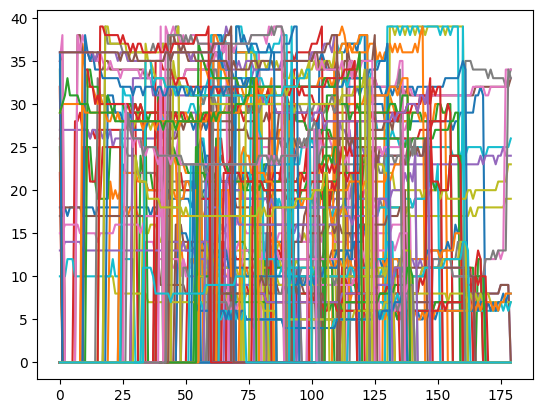

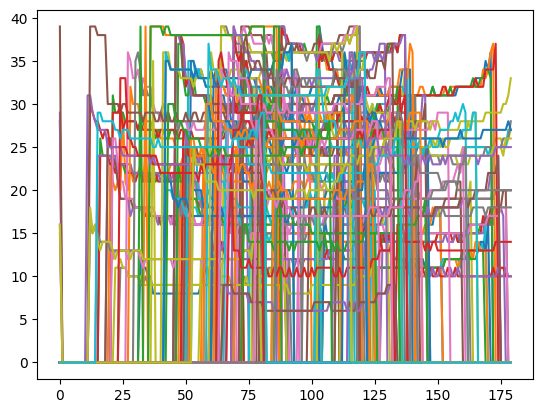

In [ ]:
for i in range(df.shape[0]//2):
  df.iloc[i,:].plot()
plt.figure()
for i in range(df.shape[0]//2,df.shape[0]):
  df.iloc[i,:].plot()

In [ ]:
# print(df.iloc[0,:])
# print('====================')
# print(df.iloc[0,::-1])

In [ ]:
# for i in range(1,df.shape[0],2):
#   df.iloc[i,:] = df.iloc[i,::-1].copy()
# df1 = df.copy()
# df.iloc[df.shape[0]//2:df.shape[0],:]=0
# for i in range(df.shape[0]//2,df.shape[0]):
#     # print(i)
#     # print(df.iloc[i,:])
#     # print(df.iloc[i,::-1])
#   df.iloc[i,:] = df1.iloc[i,::-1].copy()
# # for i in range(50,df.shape[0]):
# #   df.iloc[i,:] =0
# # for i in range(50,df.shape[0]):
# #   for ii in range(180):
# #     # print(i)
# #     # print(df.iloc[i,:])
# #     # print(df.iloc[i,::-1])
# #     df.iloc[i,ii] = df1.iloc[i,179-ii].copy()

In [ ]:
df['class'] = 0
df.iloc[(data.shape[0]//2):,-1] = 1
# df['class'][20:30] = 2
df['class']

0      0
1      0
2      0
3      0
4      0
      ..
295    1
296    1
297    1
298    1
299    1
Name: class, Length: 300, dtype: int64

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,class
0,18,18,18,17,18,18,18,18,18,18,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,26,29,0,0,0,0,28,28,29,27,...,0,0,0,0,0,0,0,0,0,0
4,27,27,27,27,27,27,27,27,27,27,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
296,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
297,0,0,0,0,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,1
298,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
print(df.iloc[0,:])
print('===================')
print(df.iloc[75,:])

0        18
1        18
2        18
3        17
4        18
         ..
176       0
177       0
178       0
179       0
class     0
Name: 0, Length: 181, dtype: int64
0        17
1        17
2        18
3        18
4        18
         ..
176       0
177       0
178       0
179       0
class     0
Name: 75, Length: 181, dtype: int64


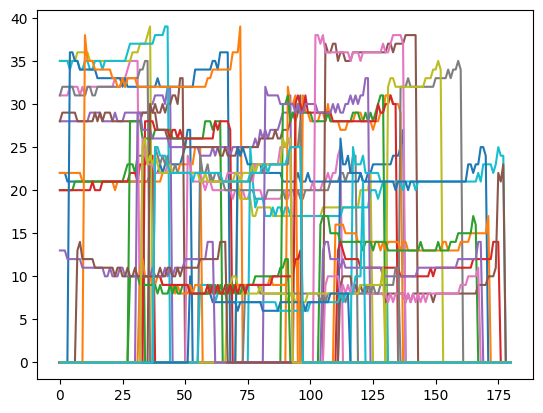

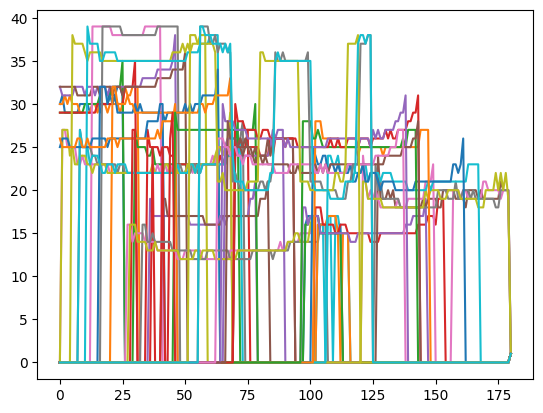

In [ ]:
for i in range(0,50):#df.shape[0]):
  df.iloc[i,:].plot()
plt.figure()
for i in range(50,100):#df.shape[0]):
  df.iloc[i,:].plot()

In [ ]:
# df[df.iloc[:,:-1] == 0] = 50

In [ ]:
# df

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [ ]:
# x_train , y_train = df.iloc[:,:-1], df.iloc[:,-1]
# kf = KFold(n_splits=100)
# for x_train , x_test in kf.split(df.iloc[:,:-1]):
#   print(x_train , x_test)

In [ ]:
x_train , y_train = df.iloc[:,:-1], df.iloc[:,-1]
x_train, x_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.3,shuffle=True)

# Classic ML

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
clf = SGDClassifier()
clf.fit(x_train,y_train)

SGDClassifier()

In [ ]:
x_test.shape

(90, 180)

In [ ]:
for i in range(y_test.shape[0]):
  print(clf.predict(x_test[i,:].reshape(1,-1)), y_test.iloc[i])

[0] 0
[1] 1
[1] 0
[1] 0
[0] 0
[0] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[0] 1
[0] 1
[1] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 0
[0] 0
[1] 1
[1] 0
[1] 0
[0] 0
[0] 1
[1] 1
[1] 1
[1] 1
[1] 1
[0] 0
[0] 0
[1] 1
[0] 0
[0] 0
[1] 0
[1] 1
[1] 0
[0] 0
[1] 1
[1] 0
[0] 0
[1] 0
[1] 1
[0] 1
[1] 1
[0] 0
[1] 0
[1] 0
[1] 1
[1] 0
[0] 1
[0] 1
[1] 0
[1] 1
[0] 0
[1] 0
[1] 1
[1] 0
[1] 1
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[0] 1
[1] 0
[0] 0
[1] 0
[0] 0
[1] 0
[1] 0
[1] 1
[1] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1


In [ ]:
preds = clf.predict(x_test)

In [ ]:
acc = []
for i in range(len(y_test)):
  if preds[i] != y_test.iloc[i]:
    acc.append(0)
  else:
    acc.append(1)
np.sum(acc)/len(acc)

0.6555555555555556

# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_clf = SVC()
svm_clf.fit(x_train,y_train)

SVC()

In [ ]:
for i in range(y_test.shape[0]):
  print(svm_clf.predict(x_test[i,:].reshape(1,-1)), y_test.iloc[i])
  #print(svm_clf.predict(np.array(x_test.iloc[i,:]).reshape(1,-1)), y_test.iloc[i])

[0] 0
[1] 1
[0] 0
[0] 0
[0] 0
[0] 0
[1] 0
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[1] 1
[0] 1
[1] 1
[1] 0
[1] 1
[1] 0
[1] 1
[1] 1
[0] 0
[1] 0
[1] 1
[0] 0
[1] 0
[0] 0
[0] 1
[1] 1
[1] 1
[1] 1
[1] 1
[1] 0
[0] 0
[0] 1
[1] 0
[0] 0
[1] 0
[1] 1
[1] 0
[0] 0
[1] 1
[1] 0
[0] 0
[0] 0
[1] 1
[1] 1
[1] 1
[0] 0
[1] 0
[0] 0
[1] 1
[0] 0
[1] 1
[0] 1
[0] 0
[1] 1
[1] 0
[1] 0
[0] 1
[0] 0
[1] 1
[0] 0
[0] 1
[1] 1
[1] 1
[0] 0
[1] 1
[0] 0
[1] 1
[1] 0
[1] 0
[1] 0
[1] 0
[1] 0
[0] 0
[1] 1
[0] 0
[0] 0
[1] 1
[0] 1
[1] 1
[1] 1
[1] 1
[1] 0
[1] 1


In [ ]:
preds = svm_clf.predict(x_test)

In [ ]:
acc = []
for i in range(len(y_test)):
  if preds[i] != y_test.iloc[i]:
    acc.append(0)
  else:
    acc.append(1)
np.sum(acc)/len(acc)

0.7

# Decsion tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
ens_class = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5).fit(x_train,y_train)
ens_class = RandomForestClassifier(n_estimators=10, max_depth=10, min_samples_leaf=5).fit(x_train,y_train)

In [ ]:
for i in range(y_test.shape[0]):
  print(ens_class.predict(x_test[i,:].reshape(1,-1)), y_test.iloc[i])
  #print(svm_clf.predict(np.array(x_test.iloc[i,:]).reshape(1,-1)), y_test.iloc[i])

[0.2556203] 1
[0.45273088] 1
[0.90568182] 1
[0.18010621] 0
[0.83205128] 1
[0.87619048] 1
[0.95444444] 1
[0.] 0
[0.5195671] 0
[0.59514652] 1
[0.88035714] 1
[0.05714286] 0
[0.661735] 1
[0.08571429] 0
[0.77996032] 1
[0.9547619] 1
[0.43778117] 1
[0.60353813] 1
[0.7052381] 0
[0.88035714] 1
[0.29535714] 0
[0.02227564] 0
[0.29208874] 1
[0.29208874] 1
[0.44353896] 0
[0.54924603] 0
[0.38119048] 1
[0.58305556] 1
[0.76666667] 1
[0.3837243] 1


In [ ]:
preds = ens_class.predict(x_test)

In [ ]:
acc = []
for i in range(len(y_test)):
  x = 0 if preds[i] < 0.5 else 1
  if x != y_test.iloc[i]:
    acc.append(0)
  else:
    acc.append(1)
np.sum(acc)/len(acc)

0.6

# ANN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam,RMSprop,SGD

In [ ]:
model = Sequential()
model.add(Dense(units=256,activation='relu',input_shape=(180,)))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
# model.compile(optimizer='adam',loss='catigorical_cross_entropy',metrics='accuracy')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               46336     
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                                 
Total params: 87553 (342.00 KB)
Trainable params: 87553 

In [ ]:
model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics='accuracy')

In [ ]:
from keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint('trained_model1.h5',monitor='val_loss',save_best_only=True,verbose=1)

In [ ]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=500,batch_size=256,callbacks=[check_point])

Epoch 1/500
1/1 [==============================] - ETA: 0s - loss: 0.7337 - accuracy: 0.4905
Epoch 1: val_loss improved from inf to 0.64416, saving model to trained_model1.h5
1/1 [==============================] - 2s 2s/step - loss: 0.7337 - accuracy: 0.4905 - val_loss: 0.6442 - val_accuracy: 0.6556
Epoch 2/500
1/1 [==============================] - ETA: 0s - loss: 0.6386 - accuracy: 0.6381
Epoch 2: val_loss improved from 0.64416 to 0.62517, saving model to trained_model1.h5
1/1 [==============================] - 0s 72ms/step - loss: 0.6386 - accuracy: 0.6381 - val_loss: 0.6252 - val_accuracy: 0.6333
Epoch 3/500
1/1 [==============================] - ETA: 0s - loss: 0.5986 - accuracy: 0.6952
Epoch 3: val_loss improved from 0.62517 to 0.61908, saving model to trained_model1.h5
1/1 [==============================] - 0s 73ms/step - loss: 0.5986 - accuracy: 0.6952 - val_loss: 0.6191 - val_accuracy: 0.6111
Epoch 4/500


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - ETA: 0s - loss: 0.5904 - accuracy: 0.7238
Epoch 4: val_loss improved from 0.61908 to 0.61139, saving model to trained_model1.h5
1/1 [==============================] - 0s 78ms/step - loss: 0.5904 - accuracy: 0.7238 - val_loss: 0.6114 - val_accuracy: 0.6444
Epoch 5/500
1/1 [==============================] - ETA: 0s - loss: 0.5479 - accuracy: 0.7524
Epoch 5: val_loss improved from 0.61139 to 0.60336, saving model to trained_model1.h5
1/1 [==============================] - 0s 70ms/step - loss: 0.5479 - accuracy: 0.7524 - val_loss: 0.6034 - val_accuracy: 0.6444
Epoch 6/500
1/1 [==============================] - ETA: 0s - loss: 0.5487 - accuracy: 0.7000
Epoch 6: val_loss improved from 0.60336 to 0.59147, saving model to trained_model1.h5
1/1 [==============================] - 0s 83ms/step - loss: 0.5487 - accuracy: 0.7000 - val_loss: 0.5915 - val_accuracy: 0.6667
Epoch 7/500
1/1 [==============================] - ETA: 0s - loss: 0.5231 - accuracy: 0.728

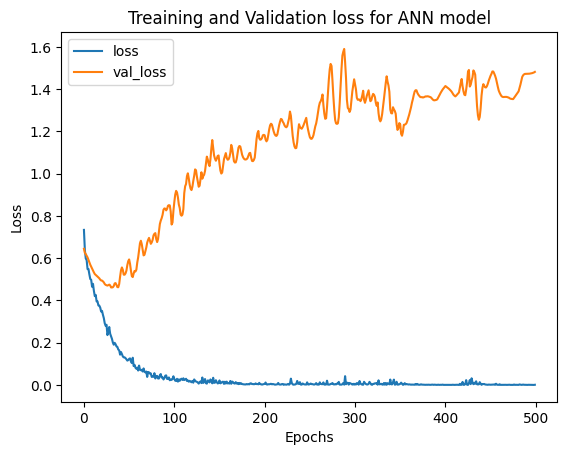

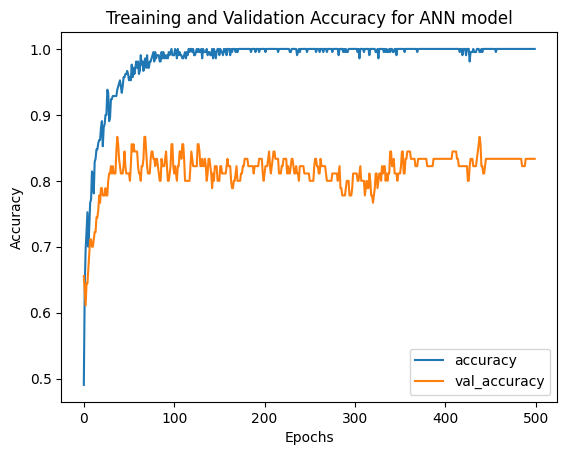

In [ ]:
for i in ['loss','val_loss']:
  plt.plot(range(len(history.history[f'{i}'])),history.history[f'{i}'],label=f'{i}')
plt.title('Treaining and Validation loss for ANN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
for i in ['accuracy','val_accuracy']:
  plt.plot(range(len(history.history[f'{i}'])),history.history[f'{i}'],label=f'{i}')
plt.title('Treaining and Validation Accuracy for ANN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
from keras.models import load_model
model1 = load_model('/content/trained_model1.h5')

In [ ]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 1.4813 - accuracy: 0.8333


[1.4813176393508911, 0.8333333134651184]

In [ ]:
model1.evaluate(x_test,y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.4613 - accuracy: 0.8111


[0.46126067638397217, 0.8111110925674438]

In [ ]:
x_test.shape

(90, 180)

In [ ]:
for i in range(y_test.shape[0]):
  if model.predict(np.array(x_test.iloc[i,:]).reshape(1,-1),verbose=0) < 0.5:
    print(0, y_test.iloc[i])
  else:
    print(1, y_test.iloc[i])

AttributeError: ignored

In [ ]:
for i in range(y_test.shape[0]):
  if model1.predict(np.array(x_test.iloc[i,:]).reshape(1,-1),verbose=0) < 0.5:
    print(0, y_test.iloc[i])
  else:
    print(1, y_test.iloc[i])

AttributeError: ignored

# CNN

In [ ]:
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten, GlobalAvgPool1D
from keras.models import Sequential
import keras
import tensorflow as tf

In [ ]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [ ]:
cnn_model = Sequential()
cnn_model.add(Conv1D(64,3,activation='relu',padding='same',input_shape=(180,1)))
cnn_model.add(MaxPool1D(2))
cnn_model.add(Conv1D(128,3,activation='relu',padding='same'))
cnn_model.add(MaxPool1D(2))
cnn_model.add(GlobalAvgPool1D())#Flatten())
cnn_model.add(Dense(units=128,activation='relu'))
cnn_model.add(Dropout(0.1))
cnn_model.add(Dense(units=1,activation='sigmoid'))
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 180, 64)           256       
                                                                 
 max_pooling1d (MaxPooling1  (None, 90, 64)            0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 90, 128)           24704     
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 45, 128)           0         
 g1D)                                                            
                                                                 
 global_average_pooling1d (  (None, 128)               0         
 GlobalAveragePooling1D)                                         
                                                        

In [ ]:
cnn_model.compile(optimizer=Adam(),loss='binary_crossentropy',metrics='accuracy')

In [ ]:
from keras.callbacks import ModelCheckpoint
check_point = ModelCheckpoint('trained_cnnmodel.h5',monitor='val_loss',save_best_only=True,verbose=1)

In [ ]:
# lr_schedule = keras.callbacks.LearningRateScheduler(
#     lambda epoch: 1e-6 * 10**(epoch / 10))
history_cnn = cnn_model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=1500,batch_size=256,callbacks=[check_point])#,lr_schedule])

Streaming output truncated to the last 5000 lines.
Epoch 251/1500
1/1 [==============================] - ETA: 0s - loss: 0.4146 - accuracy: 0.8190
Epoch 251: val_loss did not improve from 0.55602
1/1 [==============================] - 0s 156ms/step - loss: 0.4146 - accuracy: 0.8190 - val_loss: 0.5632 - val_accuracy: 0.7000
Epoch 252/1500
1/1 [==============================] - ETA: 0s - loss: 0.3990 - accuracy: 0.8286
Epoch 252: val_loss did not improve from 0.55602
1/1 [==============================] - 0s 166ms/step - loss: 0.3990 - accuracy: 0.8286 - val_loss: 0.5669 - val_accuracy: 0.7333
Epoch 253/1500
1/1 [==============================] - ETA: 0s - loss: 0.3949 - accuracy: 0.8381
Epoch 253: val_loss did not improve from 0.55602
1/1 [==============================] - 0s 164ms/step - loss: 0.3949 - accuracy: 0.8381 - val_loss: 0.5611 - val_accuracy: 0.7333
Epoch 254/1500
1/1 [==============================] - ETA: 0s - loss: 0.3907 - accuracy: 0.8286
Epoch 254: val_loss did not imp

In [ ]:
for i in ['loss','val_loss']:
  plt.plot(range(len(history_cnn.history[f'{i}'])),history_cnn.history[f'{i}'],label=f'{i}')
plt.title('Treaining and Validation loss for CNN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()
for i in ['accuracy','val_accuracy']:
  plt.plot(range(len(history_cnn.history[f'{i}'])),history_cnn.history[f'{i}'],label=f'{i}')
plt.title('Treaining and Validation Accuracy for CNN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [ ]:
from keras.models import load_model
model1 = load_model('/content/trained_cnnmodel.h5')

In [ ]:
cnn_model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 10ms/step - loss: 0.6805 - accuracy: 0.7333


[0.6805398464202881, 0.7333333492279053]

In [ ]:
model1.evaluate(x_test,y_test)

3/3 [==============================] - 0s 8ms/step - loss: 0.5608 - accuracy: 0.7111


[0.5608240365982056, 0.7111111283302307]

In [ ]:
x_test.shape

(90, 180)

In [ ]:
for i in range(y_test.shape[0]):
  if cnn_model.predict(np.array(x_test.iloc[i,:]).reshape(1,-1),verbose=0) < 0.5:
    print(0, y_test.iloc[i])
  else:
    print(1, y_test.iloc[i])

AttributeError: ignored

In [ ]:
for i in range(y_test.shape[0]):
  if model1.predict(np.array(x_test.iloc[i,:]).reshape(1,-1),verbose=0) < 0.5:
    print(0, y_test.iloc[i])
  else:
    print(1, y_test.iloc[i])